# Sample The Stars

For this exercise, our population will be the [240 stars selected by NASA](https://www.kaggle.com/datasets/brsdincer/star-type-classification) for their examples of star classification. The aim is to pick a sample of these stars. 

In [1]:
import pandas as pd
import numpy as np

# There is a Stars.csv file in the data/smaller-datasets directory
# load that file into a pandas data frame
file = pd.read_csv("/Users/ilhaam.ahmed/Projects/intro_data_analysis_with_pandas/Phase 2/csv files/Stars.csv")
stars = pd.DataFrame(file)

# Print a sample of seven stars from that data collection
print(stars.sample(7))

     Temperature    Luminosity    Radius  Abs_magnitude       Color  \
239        37882  294903.00000  1783.000          -7.80        Blue   
98         12098     689.00000     7.010           0.02  Blue-white   
175         3614  145000.00000  1553.000          -7.71         Red   
61          3432       0.00067     0.190          16.94         Red   
212        13089     788.00000     5.992          -0.12  Blue-white   
155        28700   16790.00000     6.400          -4.09  Blue-white   
12          3134       0.00040     0.196          13.21         Red   

    Spectral_Class  Type  
239              O     5  
98               A     3  
175              M     5  
61               M     0  
212              A     3  
155              B     3  
12               M     1  


Find the range in temperature of all the stars in our mini-catalogue. 

In [2]:
temperatures = stars.Temperature
highest_temp = np.max(temperatures)
lowest_temp = np.min(temperatures)
range_temp = highest_temp - lowest_temp
range_temp

38061

As an extra challenge: try to find the range for each colour of star.

In [3]:
for color, group in stars.groupby("Color"):
    temperature_range = np.ptp(group["Temperature"])
    print(f"Temperature range for {color}: {temperature_range}")


Temperature range for Blue: 34248
Temperature range for Blue-white: 21430
Temperature range for Orange: 538
Temperature range for Orange-Red: 0
Temperature range for Pale yellow orange: 0
Temperature range for Red: 4911
Temperature range for White: 7512
Temperature range for White-Yellow: 0
Temperature range for Whitish: 1648
Temperature range for Yellowish: 903
Temperature range for Yellowish White: 5290
Temperature range for yellow-white: 2950


1. 'groupby()' is used to group the DataFrame by the unique values in the "Color" column
2. The 'groupby()' function returns a group object, which represents each group (in this case grouped by color)
3. Within the loop we access the color value and the corresponding group
4. We calculate the temperature range for the group using numpy by calling np.ptp(group["Temperature"])
5. Finally we print the temeprature range for each color within the loop

In [4]:
frequency_table = stars.groupby("Color").size().reset_index(name="frequency").sort_values(by="frequency", ascending=False)
frequency_table

#stars.groupby("Color"): This groups the DataFrame by the unique values in the color column.
#.size(): This looks at the size of each group which represents the count or frequencey of occurences. counts the number of rows in each group
#.reset_index(name="frequency"): This resets the index of the series and adds a new column names frequency
#.sort_values(by="frequency", ascending=False): This sorts the frequency table in descending order.

,Color,frequency
5,Red,112
0,Blue,56
1,Blue-white,41
6,White,10
11,yellow-white,8
9,Yellowish,3
10,Yellowish White,3
2,Orange,2
8,Whitish,2
3,Orange-Red,1


For this exercise, our population will be the 240 stars selected by NASA for their examples of star classification. The aim is to use scatter diagrams to look for anything 'interesting' in the data.

The first thing to do is to look at the data. So run this code block to see a summary of it.

In [5]:
print(stars.info())
print(stars.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature     240 non-null    int64  
 1   Luminosity      240 non-null    float64
 2   Radius          240 non-null    float64
 3   Abs_magnitude   240 non-null    float64
 4   Color           240 non-null    object 
 5   Spectral_Class  240 non-null    object 
 6   Type            240 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 13.3+ KB
None
   Temperature  Luminosity  Radius  Abs_magnitude Color Spectral_Class  Type
0         3068    0.002400  0.1700          16.12   Red              M     0
1         3042    0.000500  0.1542          16.60   Red              M     0
2         2600    0.000300  0.1020          18.70   Red              M     0
3         2800    0.000200  0.1600          16.65   Red              M     0
4         1939    0.000138  0.1030    

So we can see that we have 7 columns: Temperature, Luminosity, Radius, Abs_magnitude, Color, Spectral_Class, Type
We are going to pick two of the numerical columns and plot a scatter diagram. (There is a reason why the x-axis is reversed. It has to do with a famous diagram I hope to get to later in the course.)

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, Dropdown, SelectionSlider

@interact(
        x = Dropdown(
            options=["Temperature", "Luminosity", "Radius", "Abs_magnitude"],
            value="Temperature",
            description="x-axis",
            continuous_update=False
        ),
        y = Dropdown(
            options=["Temperature", "Luminosity", "Radius", "Abs_magnitude", "Color"],
            value="Abs_magnitude",
            description="y-axis",
            continuous_update=False
        ),
        use_log = SelectionSlider(
            options = ["given values", "logarithmic"],
            value = "given values",
            description= "mode"
        )
)
def pick_xy(x, y, use_log):
    x_vals = stars[x]
    y_vals = stars[y]

    fig, ax = plt.subplots()
    if use_log == "logarithmic":
        if y == "Color":
            ax.scatter(np.log(x_vals), y_vals, c=y_vals, cmap="viridis")
        else:
            ax.scatter(np.log(x_vals), np.log(y_vals), c=y_vals, cmap="viridis")
        x = "log of " + x
        y = "log of " + y
    else:
        ax.scatter(x_vals, y_vals, c=y_vals, cmap="viridis")
    plt.gca().invert_xaxis()
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title("Scatter graph of "+x+" vs "+ y)
    plt.show()

interactive(children=(Dropdown(description='x-axis', options=('Temperature', 'Luminosity', 'Radius', 'Abs_magn…

Interesting Combinations:

- Abs_magnitude vs Temperature
- Temperature vs Luminosity (especially in logarithmic mode)


What is the code doing:
1. The @interact decorater from the ipywidgets library allows the user to select options for the x-axis, y-axis, and mode.
2. Inside the pick_xy function, the x and y axis values are retrieved from the dataframe
3. It then creates a new figure and axes using 'plt.subplots()' to preapre for plotting the scatter graph
4. The code checks the use_log variable to determine if the selected mode is "logarithmic' or 'given values'.
5. If the mode is "logarithmic", the code performs the following steps:
    - If the y-axis is "Color", it plots the scatter graph using the logarithm of x_vals as the x-axis and y_vals as the y-axis. The color of the scatter points is determined by y-vals using the viridis color map.
    - If the y-axis is not "Color", it plots the scatter graph using the logarithm of x_vals as the x-axis and the logarithm of y_vals as the y-axis. The color of the scatter points is determined by y-vals using the viridis color map.
    - The x-axis and y-axis labels are updated
6. If the mode is not "logarithmic", the code plots the scatter graph using x_vals as the x-axis and y_vals as the y-axis. The color of the scatter points is determined by y-vals using the viridis color map.
7. The x-axis is inverted using 'plt.gca().invert_xaxis()' to ensure the scatter graph is consistent with the original code.
8. The x and y axis labels are set using the 'plt.xlabel()' and 'plt.ylabel()'
9. The colorbar is displayed using 'plt.colorbar()'

Group our stars collection by colour, and find the mean temperature of each colour (rounded to 1 decimal place). Sort the results and display in a table. Use pandas this time.

In [7]:
for color, group in stars.groupby("Color"):
    mean_temperature = np.mean(group["Temperature"]).round(1)
    print(f"Mean Temperature for {color}: {mean_temperature}")

Mean Temperature for Blue: 21918.3
Mean Temperature for Blue-white: 16660.0
Mean Temperature for Orange: 4018.0
Mean Temperature for Orange-Red: 5112.0
Mean Temperature for Pale yellow orange: 7230.0
Mean Temperature for Red: 3291.8
Mean Temperature for White: 9720.3
Mean Temperature for White-Yellow: 7100.0
Mean Temperature for Whitish: 8876.0
Mean Temperature for Yellowish: 4527.7
Mean Temperature for Yellowish White: 10826.7
Mean Temperature for yellow-white: 6466.2


In [8]:
mean_temp_table = stars.groupby("Color")["Temperature"].mean().reset_index(name="Mean temperature").sort_values(by="Mean temperature", ascending=False).round(1)
mean_temp_table


,Color,Mean temperature
0,Blue,21918.3
1,Blue-white,16660.0
10,Yellowish White,10826.7
6,White,9720.3
8,Whitish,8876.0
4,Pale yellow orange,7230.0
7,White-Yellow,7100.0
11,yellow-white,6466.2
3,Orange-Red,5112.0
9,Yellowish,4527.7


Group our stars collection by colour, and find the median temperature of each colour (rounded to 1 decimal place). Sort the results and display in a table. Use pandas this time.

In [9]:
median_temp_table = stars.groupby("Color")["Temperature"].median().reset_index(name="Median Temperature").sort_values(by="Median Temperature", ascending=False).round(1)
median_temp_table

,Color,Median Temperature
0,Blue,19921.5
1,Blue-white,14100.0
10,Yellowish White,11790.0
6,White,8879.5
8,Whitish,8876.0
4,Pale yellow orange,7230.0
7,White-Yellow,7100.0
11,yellow-white,6158.0
3,Orange-Red,5112.0
9,Yellowish,4526.0


In [10]:
s = pd.Series([1, 1, 2, 2, 3, 3, 4, 4, 5, 5])
s.mode()

0    1
1    2
2    3
3    4
4    5
dtype: int64

Can you find five numbers where the mean, median, mode and range are all 4?

In [11]:
numbers = pd.Series([2, 4, 4, 4, 6])

mean = numbers.mean()
median = numbers.median()
mode = numbers.mode().values[0]
range_val = numbers.max() - numbers.min()

if mean == median == mode == range_val == 4:
    print("Found numbers where mean, median, mode and range are all equal to 4:", numbers.values)
else:
    print("Numbers not found.")

Found numbers where mean, median, mode and range are all equal to 4: [2 4 4 4 6]


Make a box-plot of the temperatures of the stars in the stars.csv dataset.

In [12]:
stars.Temperature.quantile([0.25, 0.5, 0.75])


0.25     3344.25
0.50     5776.00
0.75    15055.50
Name: Temperature, dtype: float64

<Axes: >

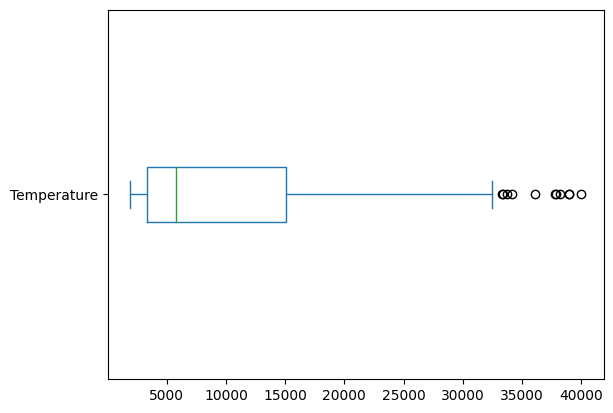

In [13]:
temps = pd.Series(stars["Temperature"])
temps.plot.box(vert=False)

Calculate the position of the whisker on the right. Use the formula 1.5 * inter-quartile range to see how far it is from the upper quartile.

In [14]:
iqr = stars.Temperature.quantile(0.75) - stars.Temperature.quantile(0.25)
right_whisker_position = stars.Temperature.quantile(0.75) + 1.5 * iqr
print("iqr", iqr)
print("right whisker",right_whisker_position)


iqr 11711.25
right whisker 32622.375
